# Import the required libraries

In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
nltk.download('omw-1.4')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### creating empty reviews list

In [2]:
alexa_reviews=[]

In [3]:
for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/Echo-Dot-4th-Gen-Blue/product-reviews/B084KSRFXJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)  
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span", attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  alexa_reviews = alexa_reviews + ip  # adding the reviews of one page to empty list which in future contains all the reviews


### writng reviews in a text file 

In [4]:
with open("oneplus.txt", "w", encoding='utf8') as output:
    output.write(str(alexa_reviews))


### Joining all the reviews into single paragraph

In [5]:
ip_rev_string = " ".join(alexa_reviews)

### Removing unwanted symbols incase if exists

In [6]:
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)


### words that contained in the reviews

In [7]:
ip_reviews_words = ip_rev_string.split(" ")

ip_reviews_words = ip_reviews_words[1:]

In [8]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(ip_reviews_words)


In [9]:
with open("F:\Data Science\Classworks\stop.txt") as sw:
    stop_words = sw.read()

In [10]:
stop_words = stop_words.split("\n")

In [11]:
stop_words.extend(["alexa","echo","time","device","product","day"])


In [12]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]


### Joining all the reviews into single paragraph 

In [13]:
ip_rev_string = " ".join(ip_reviews_words)

#### WordCloud can be performed on the string inputs.
#### Corpus level word cloud

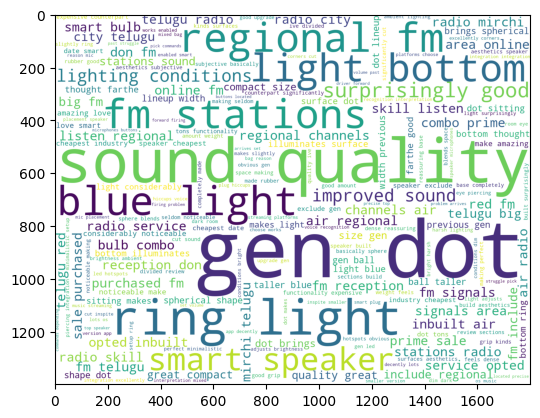

In [14]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

### positive words # Choose the path for +ve words stored in system

In [15]:
with open("F:\Data Science\Classworks\positive-words.txt", "r") as pos:
  poswords = pos.read().split("\n")

#### Positive word cloud
#### Choosing the only words which are present in positive words

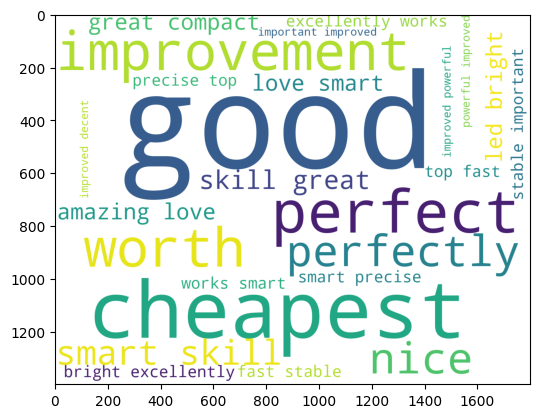

In [16]:
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)

### negative words Choose path for -ve words stored in system

In [17]:
with open("F:\Data Science\Classworks\\negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

#### negative word cloud
#### Choosing the only words which are present in negwords

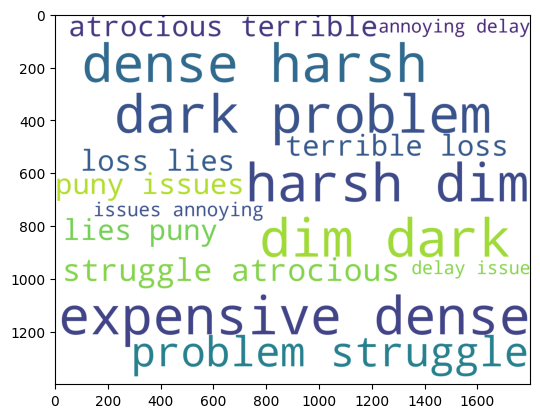

In [18]:
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)

### Joinining all the reviews into single paragraph 

In [19]:
ip_rev_string = " ".join(alexa_reviews)


In [20]:
# wordcloud with bigram

In [21]:
WNL = nltk.WordNetLemmatizer()

### Lowercase and tokenize

In [22]:
text = ip_rev_string.lower()

### Remove single quote early since it causes problems with the tokenizer.

In [23]:
text = text.replace("'", "")

In [24]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)


### Remove extra chars and remove stop words.

In [25]:
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


### Create a set of stopwords

In [26]:
stopwords_wc = set(STOPWORDS)
customised_words = ['price', 'great', '9rt'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)


### Remove stop words

In [27]:
text_content = [word for word in text_content if word not in new_stopwords]


### Take only non-empty entries

In [28]:
text_content = [s for s in text_content if len(s) != 0]


### Best to get the lemmas of each word to reduce the number of similar words

In [29]:
text_content = [WNL.lemmatize(t) for t in text_content]


In [30]:
nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('got', '4th'), ('4th', 'gen'), ('gen', 'echo'), ('echo', 'dot'), ('dot', 'smart'), ('smart', 'bulb'), ('bulb', 'combo'), ('combo', '1900/'), ('1900/', 'prime'), ('prime', 'day'), ('day', 'sale'), ('sale', 'purchased'), ('purchased', 'device'), ('device', 'mainly'), ('mainly', 'fm'), ('fm', 'reception'), ('reception', 'don'), ('don', 't'), ('t', 'better'), ('better', 'fm'), ('fm', 'signal'), ('signal', 'near'), ('near', 'area'), ('area', 'echo'), ('echo', 'online'), ('online', 'fm'), ('fm', 'radio'), ('radio', 'service'), ('service', 'opted'), ('opted', 'inbuilt'), ('inbuilt', 'air'), ('air', 'radio'), ('radio', 'skill'), ('skill', 'using'), ('using', 'listen'), ('listen', 'regional'), ('regional', 'channel'), ('channel', 'air'), ('air', 'unfortunately'), ('unfortunately', 'regional'), ('regional', 'fm'), ('fm', 'station'), ('station', 'radio'), ('radio', 'mirchi'), ('mirchi', 'telugu'), ('telugu', 'red'), ('red', 'fm'), ('fm', 'telugu'), ('telugu', 'radio'), ('radio', 'city'), ('city

In [31]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)


['got 4th', '4th gen', 'gen echo', 'echo dot', 'dot smart', 'smart bulb', 'bulb combo', 'combo 1900/', '1900/ prime', 'prime day', 'day sale', 'sale purchased', 'purchased device', 'device mainly', 'mainly fm', 'fm reception', 'reception don', 'don t', 't better', 'better fm', 'fm signal', 'signal near', 'near area', 'area echo', 'echo online', 'online fm', 'fm radio', 'radio service', 'service opted', 'opted inbuilt', 'inbuilt air', 'air radio', 'radio skill', 'skill using', 'using listen', 'listen regional', 'regional channel', 'channel air', 'air unfortunately', 'unfortunately regional', 'regional fm', 'fm station', 'station radio', 'radio mirchi', 'mirchi telugu', 'telugu red', 'red fm', 'fm telugu', 'telugu radio', 'radio city', 'city telugu', 'telugu big', 'big fm', 'fm include', 'include regional', 'regional fm', 'fm station', 'station much', 'much better', 'better sound', 'sound quality', 'quality compact', 'compact size', 'size come', 'come new', 'new 4th', '4th gen', 'gen ech

### Using count vectoriser to view the frequency of bigrams

In [32]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'got 4th': 184,
 '4th gen': 4,
 'gen echo': 169,
 'echo dot': 138,
 'dot smart': 129,
 'smart bulb': 350,
 'bulb combo': 69,
 'combo 1900': 79,
 '1900 prime': 2,
 'prime day': 287,
 'day sale': 102,
 'sale purchased': 329,
 'purchased device': 292,
 'device mainly': 111,
 'mainly fm': 233,
 'fm reception': 157,
 'reception don': 307,
 'better fm': 51,
 'fm signal': 158,
 'signal near': 339,
 'near area': 250,
 'area echo': 37,
 'echo online': 139,
 'online fm': 269,
 'fm radio': 156,
 'radio service': 302,
 'service opted': 333,
 'opted inbuilt': 270,
 'inbuilt air': 199,
 'air radio': 17,
 'radio skill': 303,
 'skill using': 345,
 'using listen': 400,
 'listen regional': 223,
 'regional channel': 312,
 'channel air': 72,
 'air unfortunately': 18,
 'unfortunately regional': 396,
 'regional fm': 313,
 'fm station': 159,
 'station radio': 376,
 'radio mirchi': 301,
 'mirchi telugu': 243,
 'telugu red': 387,
 'red fm': 311,
 'fm telugu': 160,
 'telugu radio': 386,
 'radio city': 300,
 'c

In [33]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('echo dot', 35), ('sound quality', 35), ('gen echo', 21), ('ring light', 21), ('last gen', 21), ('4th gen', 14), ('regional fm', 14), ('fm station', 14), ('3rd gen', 14), ('blue light', 14), ('smart speaker', 14), ('speaker one', 14), ('surprisingly well', 14), ('lighting condition', 14), ('alexa app', 14), ('improved sound', 14), ('टन करन', 14), ('करन पड', 14), ('कन शन', 14), ('सप नस', 14), ('got 4th', 7), ('dot smart', 7), ('smart bulb', 7), ('bulb combo', 7), ('combo 1900', 7), ('1900 prime', 7), ('prime day', 7), ('day sale', 7), ('sale purchased', 7), ('purchased device', 7), ('device mainly', 7), ('mainly fm', 7), ('fm reception', 7), ('reception don', 7), ('better fm', 7), ('fm signal', 7), ('signal near', 7), ('near area', 7), ('area echo', 7), ('echo online', 7), ('online fm', 7), ('fm radio', 7), ('radio service', 7), ('service opted', 7), ('opted inbuilt', 7), ('inbuilt air', 7), ('air radio', 7), ('radio skill', 7), ('skill using', 7), ('using listen', 7), ('listen region

### Generating wordcloud

In [34]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords, background_color='White')

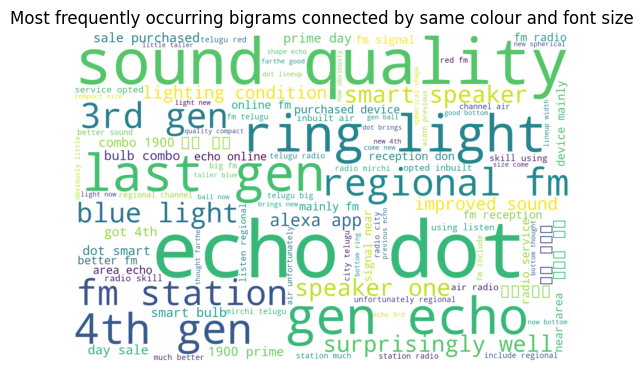

In [35]:
wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()